# **Import Library yang dibutuhkan**

In [3]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [4]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Tiktok_1.csv")
df.head()

,userName,score,at,content
0,Dafa,1,2024-04-26 11:39:15,bintang satu soal added terus
1,Manggg sate,5,2024-04-26 11:38:29,Mantap
2,Arlos Purba,5,2024-04-26 11:37:40,Aplikasi ini bagus banget dan cocok untuk hiburan
3,Tiara Manis,1,2024-04-26 11:35:14,Aplikasinya tiktok nya saat foto sudah tdk sep...
4,Lek Pur,5,2024-04-26 11:35:06,Menghibur


In [5]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,bintang satu soal added terus,Dafa,2024-04-26 11:39:15
1,Mantap,Manggg sate,2024-04-26 11:38:29
2,Aplikasi ini bagus banget dan cocok untuk hiburan,Arlos Purba,2024-04-26 11:37:40
3,Aplikasinya tiktok nya saat foto sudah tdk sep...,Tiara Manis,2024-04-26 11:35:14
4,Menghibur,Lek Pur,2024-04-26 11:35:06
...,...,...,...
194,♥️♥️♥️♥️♥️♥️🙏🙏♥️♥️♥️♥️♥️♥️♥️♥️💯,STEPHANIE CRISTINE RIOK,2024-04-26 09:09:49
195,Gak bisa bikin akun karna anak kecillll!!!!! L...,lafione pondaag,2024-04-26 09:09:19
196,"hanya satu kata ""bagus banget aplikasi ny woyyyy""",Citra Ayu setya,2024-04-26 09:08:09
197,"Ko pembayaran gopay di ttk gabisa di pake?,pad...",Rodliyah Smu,2024-04-26 09:03:50


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,185,199,197
top,Bagus,Dafa,2024-04-26 10:28:12
freq,6,1,2


# **Cleaning Data**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [9]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong
df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [13]:
df.shape

(185, 3)

In [14]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [15]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [16]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bintang satu soal added terus,Dafa,2024-04-26 11:39:15
1,mantap,Manggg sate,2024-04-26 11:38:29
2,aplikasi ini bagus banget dan cocok untuk hiburan,Arlos Purba,2024-04-26 11:37:40
3,aplikasinya tiktok nya saat foto sudah tdk sep...,Tiara Manis,2024-04-26 11:35:14
4,menghibur,Lek Pur,2024-04-26 11:35:06
...,...,...,...
194,,STEPHANIE CRISTINE RIOK,2024-04-26 09:09:49
195,gak bisa bikin akun karna anak kecillll loharu...,lafione pondaag,2024-04-26 09:09:19
196,hanya satu kata bagus banget aplikasi ny woyyyy,Citra Ayu setya,2024-04-26 09:08:09
197,ko pembayaran gopay di ttk gabisa di pakepadah...,Rodliyah Smu,2024-04-26 09:03:50


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [18]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bintang satu soal added terus,Dafa,2024-04-26 11:39:15
1,mantap,Manggg sate,2024-04-26 11:38:29
2,aplikasi ini bagus banget dan cocok untuk hiburan,Arlos Purba,2024-04-26 11:37:40
3,aplikasinya tiktok nya saat foto sudah tdk sep...,Tiara Manis,2024-04-26 11:35:14
4,menghibur,Lek Pur,2024-04-26 11:35:06
...,...,...,...
194,,STEPHANIE CRISTINE RIOK,2024-04-26 09:09:49
195,tidak bisa bikin akun karna anak kecillll loha...,lafione pondaag,2024-04-26 09:09:19
196,hanya satu kata bagus banget aplikasi ny woyyyy,Citra Ayu setya,2024-04-26 09:08:09
197,ko pembayaran gopay di Tiktok gabisa di pakepa...,Rodliyah Smu,2024-04-26 09:03:50


In [19]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [20]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bintang satu soal added terus,Dafa,2024-04-26 11:39:15
1,mantap,Manggg sate,2024-04-26 11:38:29
2,aplikasi bagus banget cocok hiburan,Arlos Purba,2024-04-26 11:37:40
3,aplikasinya tiktok nya foto tdk dlu sekarang m...,Tiara Manis,2024-04-26 11:35:14
4,menghibur,Lek Pur,2024-04-26 11:35:06
...,...,...,...
194,,STEPHANIE CRISTINE RIOK,2024-04-26 09:09:49
195,bisa bikin akun karna anak kecillll loharu bua...,lafione pondaag,2024-04-26 09:09:19
196,satu kata bagus banget aplikasi ny woyyyy,Citra Ayu setya,2024-04-26 09:08:09
197,ko pembayaran gopay Tiktok gabisa pakepadahal ...,Rodliyah Smu,2024-04-26 09:03:50


In [21]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                    [bintang, satu, soal, added, terus]
1                                               [mantap]
2              [aplikasi, bagus, banget, cocok, hiburan]
3      [aplikasinya, tiktok, nya, foto, tdk, dlu, sek...
4                                            [menghibur]
                             ...                        
194                                                   []
195    [bisa, bikin, akun, karna, anak, kecillll, loh...
196    [satu, kata, bagus, banget, aplikasi, ny, woyyyy]
197    [ko, pembayaran, gopay, Tiktok, gabisa, pakepa...
198                                                [heh]
Name: content, Length: 185, dtype: object

In [22]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Tiktok_1.csv', index = False)


In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Tiktok_1.csv', encoding = 'latin1')
df_clean

,content
0,bintang satu soal added terus
1,mantap
2,aplikasi bagus banget cocok hibur
3,aplikasi tiktok nya foto tdk dlu sekarang mest...
4,hibur
...,...
180,NaN
181,bisa bikin akun karna anak kecillll loharu bua...
182,satu kata bagus banget aplikasi ny woyyyy
183,ko bayar gopay tiktok gabisa pakepadahal isi s...


# **Translate**

In [24]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [25]:
import pandas as pd
from easynmt import EasyNMT

In [26]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Tiktok_1.csv', encoding='latin1')

In [27]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [28]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 12.5MB/s]                   


In [29]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,bintang satu soal added terus
1,mantap
2,aplikasi bagus banget cocok hibur
3,aplikasi tiktok nya foto tdk dlu sekarang mest...
4,hibur
...,...
180,sangat bagusrekomendasi sangat
181,bisa bikin akun karna anak kecillll loharu bua...
182,satu kata bagus banget aplikasi ny woyyyy
183,ko bayar gopay tiktok gabisa pakepadahal isi s...


In [30]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_tiktok_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [32]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_tiktok_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bintang satu soal added terus,"fontcolor="" # FFFF00""staroneaboutadedkeep"
1,1,mantap,Steady.
2,2,aplikasi bagus banget cocok hibur,The application is very good. It's a good matc...
3,3,aplikasi tiktok nya foto tdk dlu sekarang mest...,The keyboard has to use a non-regular photo.
4,4,hibur,Comfort
...,...,...,...
180,180,sangat bagusrekomendasi sangat,Very nice recommendation.
181,181,bisa bikin akun karna anak kecillll loharu bua...,Could make an account for a little boy. You kn...
182,182,satu kata bagus banget aplikasi ny woyyyy,One good word. Mrs. Woyyyyyy app.
183,183,ko bayar gopay tiktok gabisa pakepadahal isi s...,ko pay gopay tiktok can not control the conten...


# **Labeling**

In [33]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_tiktok_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bintang satu soal added terus,"fontcolor="" # FFFF00""staroneaboutadedkeep"
1,1,mantap,Steady.
2,2,aplikasi bagus banget cocok hibur,The application is very good. It's a good matc...
3,3,aplikasi tiktok nya foto tdk dlu sekarang mest...,The keyboard has to use a non-regular photo.
4,4,hibur,Comfort
...,...,...,...
180,180,sangat bagusrekomendasi sangat,Very nice recommendation.
181,181,bisa bikin akun karna anak kecillll loharu bua...,Could make an account for a little boy. You kn...
182,182,satu kata bagus banget aplikasi ny woyyyy,One good word. Mrs. Woyyyyyy app.
183,183,ko bayar gopay tiktok gabisa pakepadahal isi s...,ko pay gopay tiktok can not control the conten...


In [34]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [35]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 99
Netral = 76
Negatif = 10

Total Data Seluruhnya : 185


In [37]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,bintang satu soal added terus,"fontcolor="" # FFFF00""staroneaboutadedkeep",Netral
1,1,mantap,Steady.,Positif
2,2,aplikasi bagus banget cocok hibur,The application is very good. It's a good matc...,Positif
3,3,aplikasi tiktok nya foto tdk dlu sekarang mest...,The keyboard has to use a non-regular photo.,Netral
4,4,hibur,Comfort,Netral
...,...,...,...,...
180,180,sangat bagusrekomendasi sangat,Very nice recommendation.,Positif
181,181,bisa bikin akun karna anak kecillll loharu bua...,Could make an account for a little boy. You kn...,Positif
182,182,satu kata bagus banget aplikasi ny woyyyy,One good word. Mrs. Woyyyyyy app.,Positif
183,183,ko bayar gopay tiktok gabisa pakepadahal isi s...,ko pay gopay tiktok can not control the conten...,Positif


In [38]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,bintang satu soal added terus,"fontcolor="" # FFFF00""staroneaboutadedkeep",Netral
1,mantap,Steady.,Positif
2,aplikasi bagus banget cocok hibur,The application is very good. It's a good matc...,Positif
3,aplikasi tiktok nya foto tdk dlu sekarang mest...,The keyboard has to use a non-regular photo.,Netral
4,hibur,Comfort,Netral
...,...,...,...
180,sangat bagusrekomendasi sangat,Very nice recommendation.,Positif
181,bisa bikin akun karna anak kecillll loharu bua...,Could make an account for a little boy. You kn...,Positif
182,satu kata bagus banget aplikasi ny woyyyy,One good word. Mrs. Woyyyyyy app.,Positif
183,ko bayar gopay tiktok gabisa pakepadahal isi s...,ko pay gopay tiktok can not control the conten...,Positif


# **Visualisasi**


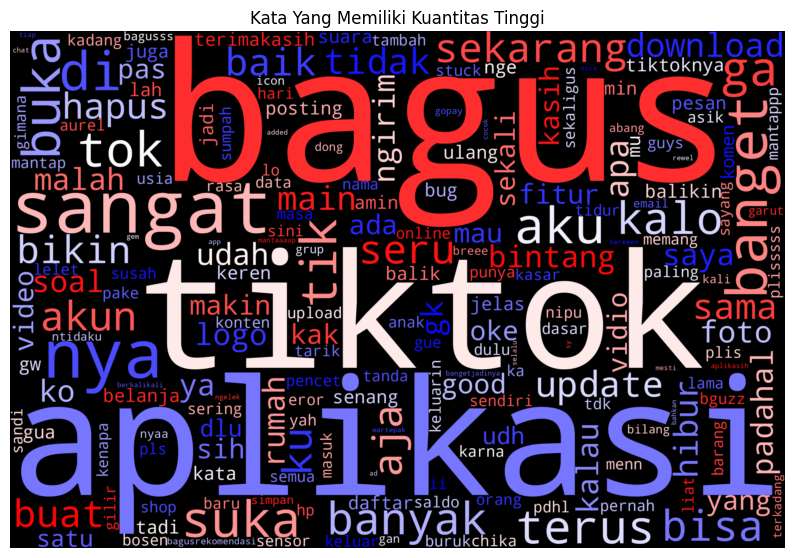

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


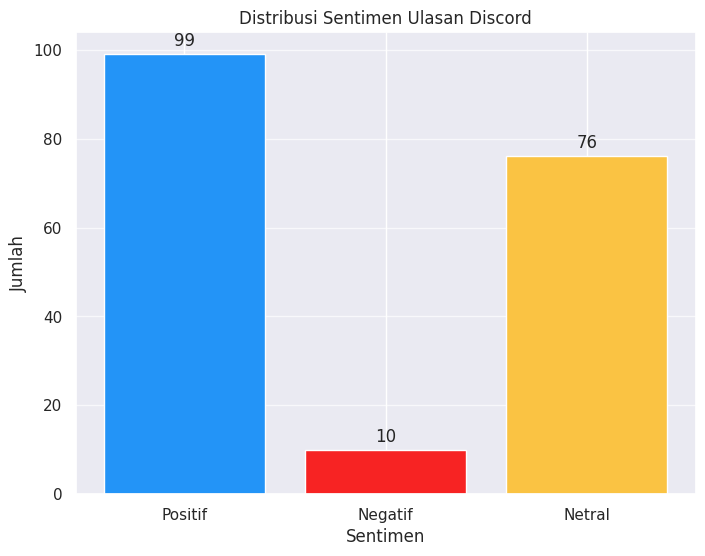

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [41]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,mantap,Steady.,Positif
2,aplikasi bagus banget cocok hibur,The application is very good. It's a good matc...,Positif
5,baik,Okay.,Positif
7,tiktok bagus dulu ga buat foto,It's a good ticktock. It doesn't make pictures.,Positif
11,tiktoknya sangat bagus tarik tiap hari kalau b...,The ticktock is really good. Pull it every day...,Negatif
...,...,...,...
179,sangat bagusrekomendasi sangat,Very nice recommendation.,Positif
180,sangat bagusrekomendasi sangat,Very nice recommendation.,Positif
181,bisa bikin akun karna anak kecillll loharu bua...,Could make an account for a little boy. You kn...,Positif
182,satu kata bagus banget aplikasi ny woyyyy,One good word. Mrs. Woyyyyyy app.,Positif


In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,mantap,Steady.,1
2,aplikasi bagus banget cocok hibur,The application is very good. It's a good matc...,1
5,baik,Okay.,1
7,tiktok bagus dulu ga buat foto,It's a good ticktock. It doesn't make pictures.,1
11,tiktoknya sangat bagus tarik tiap hari kalau b...,The ticktock is really good. Pull it every day...,0
...,...,...,...
179,sangat bagusrekomendasi sangat,Very nice recommendation.,1
180,sangat bagusrekomendasi sangat,Very nice recommendation.,1
181,bisa bikin akun karna anak kecillll loharu bua...,Could make an account for a little boy. You kn...,1
182,satu kata bagus banget aplikasi ny woyyyy,One good word. Mrs. Woyyyyyy app.,1


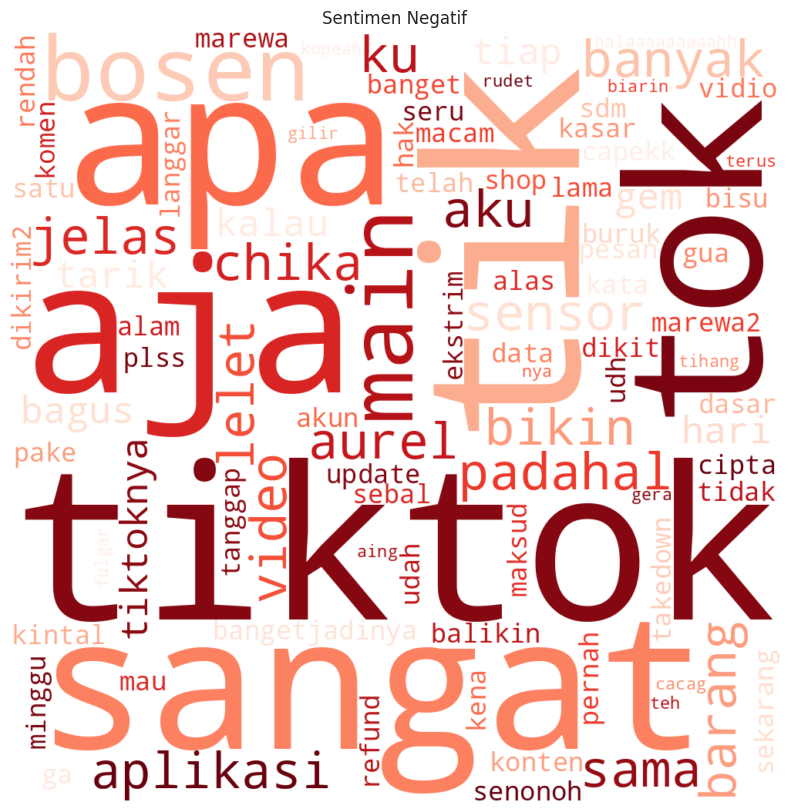

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

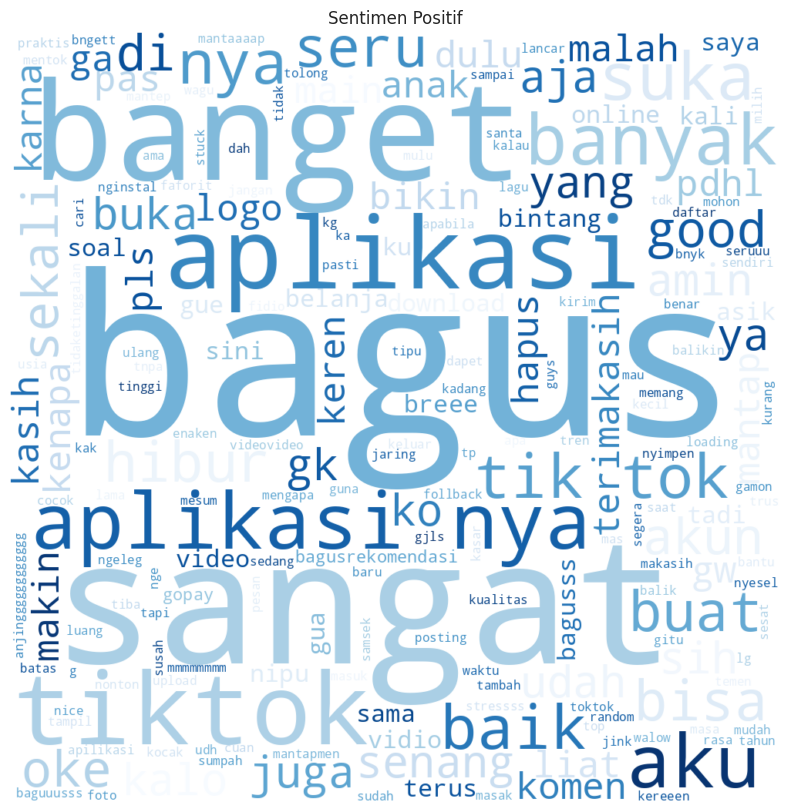

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

1    99
0    10
Name: sentimen, dtype: int64

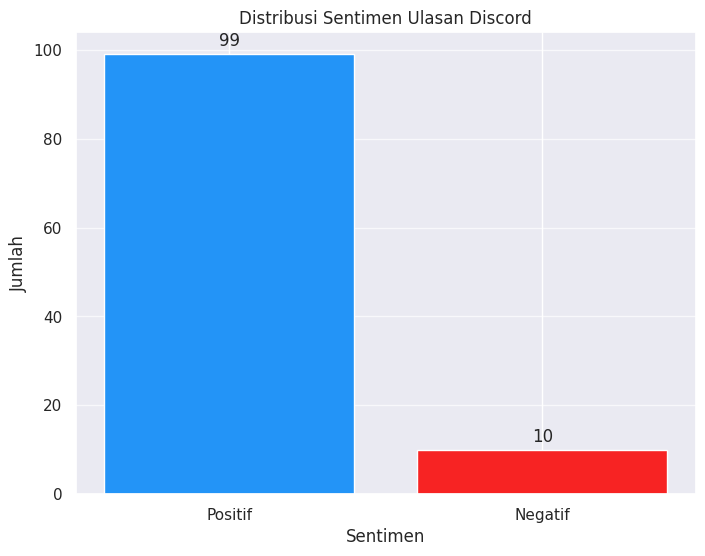

In [46]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

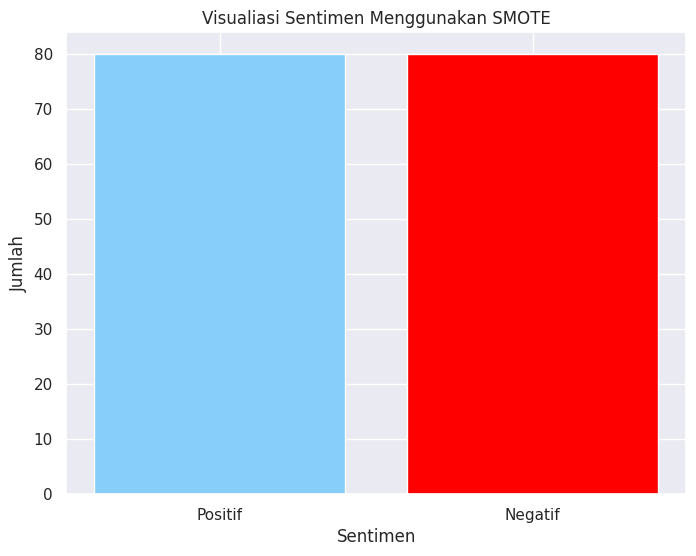

In [51]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [52]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [53]:
y_pred = naive_bayes.predict(X_test_vec)

In [54]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7272727272727273

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         3
     Positif       0.84      0.84      0.84        19

    accuracy                           0.73        22
   macro avg       0.42      0.42      0.42        22
weighted avg       0.73      0.73      0.73        22



# **Testing**


In [55]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : Aplikasi tiktok sangat bagus dan mudah untuk digunakan
Hasil Analisis Sentimen Untuk Teks Baru : Positif
